Preprocessor loaded from D:\healthcare_analytics_project\models\preprocessor.pkl
Model loaded from D:\healthcare_analytics_project\models\best_model.pkl

Evaluating Final Model:

Final Evaluation Metrics for Best Model:
Accuracy: 0.91
Precision: 0.98
Recall: 0.84
F1-Score: 0.90
AUC-ROC: 0.95
Matthews Correlation Coefficient: 0.83


d:\healthcare_analytics_project\.venv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\healthcare_analytics_project\.venv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


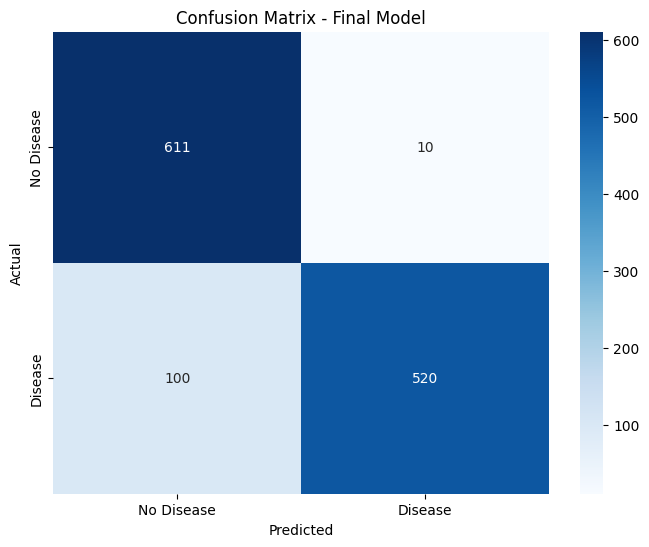

Confusion matrix saved to D:\healthcare_analytics_project\notebooks\visualization_images\confusion_matrix_final.png


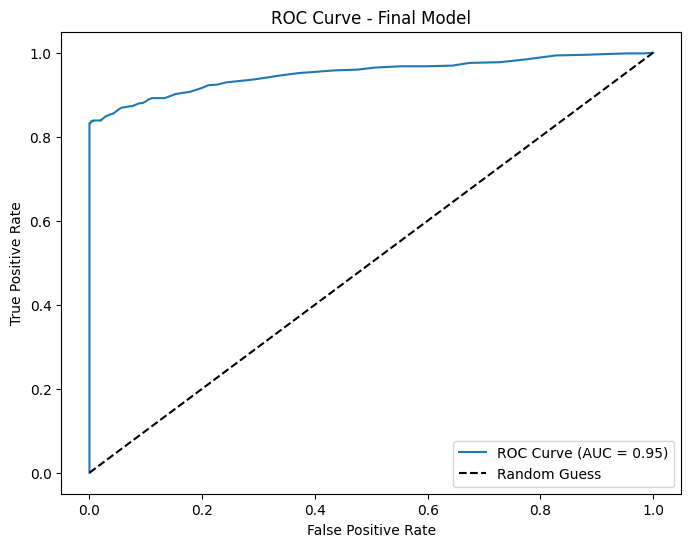

ROC curve saved to D:\healthcare_analytics_project\notebooks\visualization_images\roc_curve_final.png

Final Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       621
           1       0.98      0.84      0.90       620

    accuracy                           0.91      1241
   macro avg       0.92      0.91      0.91      1241
weighted avg       0.92      0.91      0.91      1241

Final model saved to D:\healthcare_analytics_project\models\final_model.pkl
Final preprocessor saved to D:\healthcare_analytics_project\models\final_preprocessor.pkl


In [20]:
# Import necessary libraries
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, matthews_corrcoef, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
model_data_path = os.path.abspath('D:/healthcare_analytics_project/models/')
preprocessed_data_path = os.path.abspath('D:/healthcare_analytics_project/data/processed/')
visualization_path = os.path.abspath('D:/healthcare_analytics_project/notebooks/visualization_images/')

# Create necessary directories if they don't exist
os.makedirs(visualization_path, exist_ok=True)

# Load preprocessed data
train_data_path = os.path.join(preprocessed_data_path, 'train_data.npz')
test_data_path = os.path.join(preprocessed_data_path, 'test_data.npz')

assert os.path.exists(train_data_path), f"Training data not found at {train_data_path}"
assert os.path.exists(test_data_path), f"Test data not found at {test_data_path}"

train_data = np.load(train_data_path)
test_data = np.load(test_data_path)

X_train, y_train = train_data['X_train'], train_data['y_train']
X_test, y_test = test_data['X_test'], test_data['y_test']

# Load the preprocessor and trained model
preprocessor_path = os.path.join(model_data_path, 'preprocessor.pkl')
best_model_path = os.path.join(model_data_path, 'best_model.pkl')

assert os.path.exists(preprocessor_path), f"Preprocessor not found at {preprocessor_path}"
assert os.path.exists(best_model_path), f"Model not found at {best_model_path}"

preprocessor = joblib.load(preprocessor_path)
best_model = joblib.load(best_model_path)

print(f"Preprocessor loaded from {preprocessor_path}")
print(f"Model loaded from {best_model_path}")

# Final evaluation function
def evaluate_final_model(model, X, y, model_name):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)
    mcc = matthews_corrcoef(y, y_pred)
    
    print(f"\nFinal Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {roc_auc:.2f}")
    print(f"Matthews Correlation Coefficient: {mcc:.2f}")
    
    return y_pred, y_prob, roc_auc

# Evaluate the model
print("\nEvaluating Final Model:")
y_pred_final, y_prob_final, roc_auc_final = evaluate_final_model(best_model, X_test, y_test, "Best Model")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Final Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
conf_matrix_path = os.path.join(visualization_path, 'confusion_matrix_final.png')
plt.savefig(conf_matrix_path)
plt.show()
print(f"Confusion matrix saved to {conf_matrix_path}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_final:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve - Final Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
roc_curve_path = os.path.join(visualization_path, 'roc_curve_final.png')
plt.savefig(roc_curve_path)
plt.show()
print(f"ROC curve saved to {roc_curve_path}")

# Classification report
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

# Save the final model and preprocessor
final_model_path = os.path.join(model_data_path, 'final_model.pkl')
joblib.dump(best_model, final_model_path)
print(f"Final model saved to {final_model_path}")

final_preprocessor_path = os.path.join(model_data_path, 'final_preprocessor.pkl')
joblib.dump(preprocessor, final_preprocessor_path)
print(f"Final preprocessor saved to {final_preprocessor_path}")
